In [1]:
#mount drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [2]:
#confirm writers
import os
chapters = []
pathWriters = "/content/drive/MyDrive/projectLBITFW/deploy/"
for i in os.listdir(pathWriters):
  chapters.append(pathWriters + i)
chapters

['/content/drive/MyDrive/projectLBITFW/deploy/writer2.txt',
 '/content/drive/MyDrive/projectLBITFW/deploy/writer1.txt']

In [3]:
#makes chapters list
books = [
    "/content/drive/MyDrive/projectLBITFW/chapter6.txt"
]
import os
chapters = []
pathWriters = "/content/drive/MyDrive/projectLBITFW/deploy/"
for i in os.listdir(pathWriters):
  chapters.append(pathWriters + i)
chapters

['/content/drive/MyDrive/projectLBITFW/deploy/writer2.txt',
 '/content/drive/MyDrive/projectLBITFW/deploy/writer1.txt']

In [4]:
#update words
from datetime import datetime
import pandas as pd
wordPath = "/content/drive/MyDrive/projectLBITFW/words.csv"
wordcount = 0
additional = 4438979 + 5100825 + 5557881 + 5371037 + 4433589

bookLength = []
books = books
chapterLength = []
chapters = chapters
for i in chapters:
    try:
        with open(i, "r", encoding="utf-8") as file:
            curr = file.read()
    except UnicodeDecodeError:
        with open(i, "r", encoding="cp1252") as file:
            curr = file.read()
    curr = curr.replace(".",". ")
    curr = curr.replace("<|endoftext|>"," ")
    for e in range(10):
      curr = curr.replace("  "," ")
    chapterLength.append(len(curr.split()))
    wordcount += len(curr.split())
"""
for i in chapters:
  curr = open(i,"r",encoding = "utf8").read()
  curr = curr.replace(".",". ")
  curr = curr.replace("<|endoftext|>"," ")
  for e in range(10):
    curr = curr.replace("  "," ")
  chapterLength.append(len(curr.split()))
  wordcount += len(curr.split())
"""
for i in books:
  curr = open(i,"r",encoding = "utf8").read()
  curr = curr.replace(".",". ")
  curr = curr.replace("<|endoftext|>"," ")
  for e in range(10):
    curr = curr.replace("  "," ")
  wordcount += len(curr.split())
wordcount += additional
print(chapterLength)
print(sum(chapterLength))
print(wordcount)

[220027, 215228]
435255
33462979


In [5]:
#update csv
df = pd.read_csv(wordPath)
row = {"time":str(datetime.now()),"words":wordcount}
df = pd.concat([df,pd.DataFrame([row])],ignore_index=True)
df = df[["time","words"]]
df.to_csv(wordPath)

In [6]:

#find date
import numpy as np
print(chapterLength)
print(wordcount)
date = datetime.now()
date = str(date)

[220027, 215228]
33462979


In [7]:
#converts time column to datetime datatype
import datetime
from datetime import datetime
df = pd.read_csv(wordPath)
def dataconv(row):
  row = datetime.strptime(row, '%Y-%m-%d %H:%M:%S.%f')
  return row
def wordconv(row):
  row = int(row)
  return row
df["time"] = df["time"].apply(dataconv)
df["words"] = df["words"].apply(wordconv)
df

,Unnamed: 0,time,words
0,0,2024-09-04 03:39:11.243529,2797
1,1,2024-09-04 03:59:59.545325,5080
2,2,2024-09-04 04:01:57.097803,5275
3,3,2024-09-04 04:04:03.303378,5494
4,4,2024-09-04 04:27:01.455322,7925
...,...,...,...
125,125,2024-10-09 19:56:34.763927,29121132
126,126,2024-10-10 21:06:29.603040,30312767
127,127,2024-10-11 20:12:17.678701,31583681
128,128,2024-10-12 18:35:16.171462,33027724


<Axes: xlabel='time', ylabel='words'>

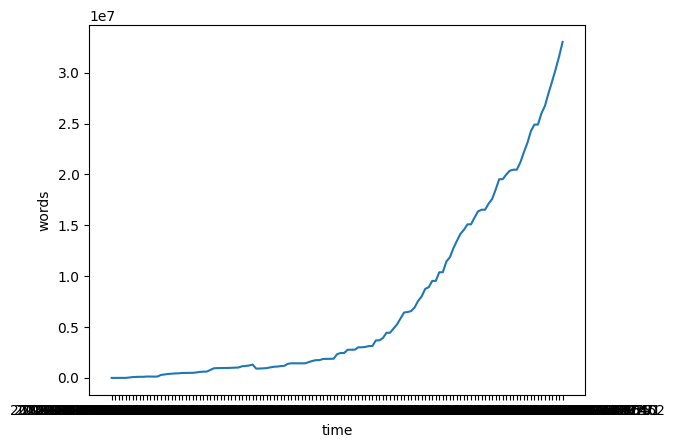

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.lineplot(data = df,x = "time",y = "words")

<Axes: >

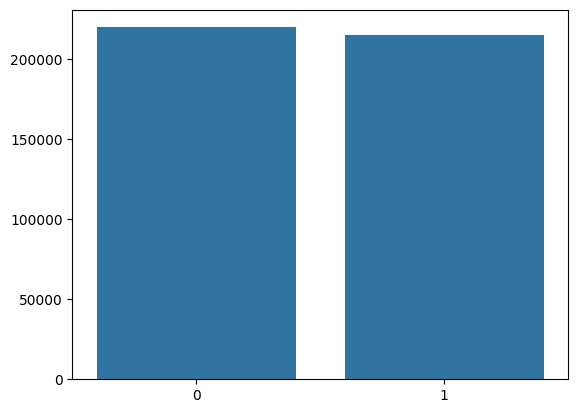

In [9]:

 sns.barplot(data = chapterLength)

In [10]:
#packs words into chapter
def addAndErase(destination,starting):
  final = open(destination,"a+")
  try:
    start = open(starting,"r",encoding="cp1252").read()
  except:
    start = open(starting,"r",encoding="utf8").read()
  final.write(start)
  open(starting,"w").write("")

for i in chapters:
  starting = i
  addAndErase("/content/drive/MyDrive/projectLBITFW/chapter6.txt",starting)

In [11]:
"""
df = pd.read_csv(wordPath)
df = df[:-1]
df.to_csv(wordPath)
"""

In [ ]:
df = pd.read_csv(wordPath)

<Axes: xlabel='time', ylabel='words'>

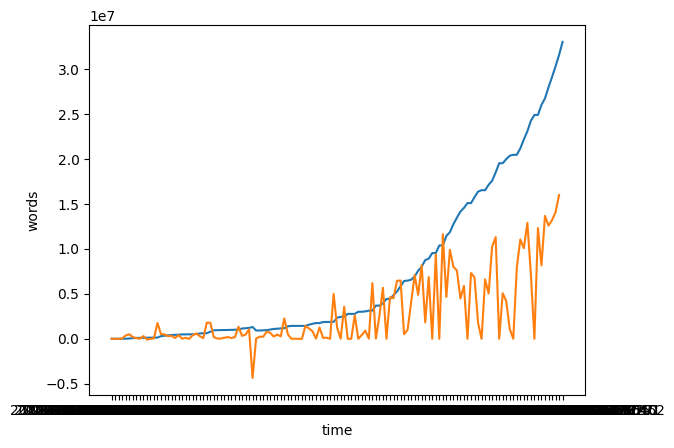

In [ ]:
#graph
slope = []

last = None
for i in df.iterrows():
  if last:
    currDate = datetime.strptime(i[1]["time"], '%Y-%m-%d %H:%M:%S.%f')
    lastDate = datetime.strptime(last[1]["time"], '%Y-%m-%d %H:%M:%S.%f')
    timeElapsed = currDate-lastDate

    wordsIn = i[1]["words"] - last[1]["words"]
    slope.append(wordsIn)
  last = i
factor = 16000000/max(slope)
for i in range(len(slope)):
  slope[i] = slope[i] * factor
sns.lineplot(data = df,x = "time",y = "words")
sns.lineplot(slope)